In [1]:
import os
import sys
import pandas as pd
import seaborn as sns

# Results grid analysis notebook

Running the trials and experiments via Ray produces a number of files that are related to the "experiment" (dataset and all the strategies + all the repeated runs, each being a "trial"). Each trial is stored individually, but will be read and collected by a `result_grid` object that can be used to analyse results at the experiment and trial level.

This notebook is intended to be used for all the experiments, adapt as necessary to produce the relevant plots.

In [2]:
# Load result_grid
# Adapt as needed
from ray import tune
experiment_name = "diabetes"
storage_path = os.path.join(os.getcwd(), f"ray_benchmark_results")
experiment_path = os.path.join(storage_path, experiment_name)

print(f"Loading results from {experiment_path}...")

restored_tuner = tune.Tuner.restore(experiment_path, trainable="trial")
result_grid = restored_tuner.get_results()
print(f"Type of result_grid: {type(result_grid)}")


/Users/rlps281/miniconda3/envs/pyrelational/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-26 14:51:42,582	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-26 14:51:42,833	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Loading results from /Users/rlps281/workspace/pyrelational/benchmarking/ray_benchmark_results/diabetes...
Type of result_grid: <class 'ray.tune.result_grid.ResultGrid'>


In [3]:
# First we will do some housekeeping to make sure our results grid is as we expect

# Check if there have been errors
if result_grid.errors:
    print("One of the trials failed!")
else:
    print("No errors!")

num_results = len(result_grid)
print("Number of results:", num_results)

# Iterate over results
for i, result in enumerate(result_grid):
    if result.error:
        print(f"Trial #{i} had an error:", result.error)
        continue

    print(
        f"Trial #{i} finished successfully with a test metric of: {result.metrics["score"]}"
    )

No errors!
Number of results: 35
Trial #0 finished successfully with a test metric of: 19551755.821720973
Trial #1 finished successfully with a test metric of: 8593713.45991683
Trial #2 finished successfully with a test metric of: 33997193.86324091
Trial #3 finished successfully with a test metric of: 7053773.043244784
Trial #4 finished successfully with a test metric of: 17009888.14856967
Trial #5 finished successfully with a test metric of: 13018275.569043871
Trial #6 finished successfully with a test metric of: 11875017.98297041
Trial #7 finished successfully with a test metric of: 18465837.9220927
Trial #8 finished successfully with a test metric of: 30050080.282666683
Trial #9 finished successfully with a test metric of: 9783894.590476848
Trial #10 finished successfully with a test metric of: 18810200.941099305
Trial #11 finished successfully with a test metric of: 15711310.213188497
Trial #12 finished successfully with a test metric of: 5231190.285921382
Trial #13 finished succes

In [4]:
results_df = result_grid.get_dataframe()

In [5]:
results_df

,score,iteration_metrics,timestamp,checkpoint_dir_name,done,training_iteration,trial_id,date,time_this_iter_s,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/seed,config/strategy,logdir
0,1.955176e+07,"[7462.718005199594, 5019.022523754763, 5865.11...",1729950443,None,False,1,adb6f_00016,2024-10-26_14-47-23,2.676988,2.676988,50759,mba-rlps281,127.0.0.1,2.676988,1,2,thompson_sampling,adb6f_00016
1,8.593713e+06,"[7462.718005199594, 6352.960985621767, 5779.72...",1729950386,None,False,1,adb6f_00001,2024-10-26_14-46-26,2.823731,2.823731,50720,mba-rlps281,127.0.0.1,2.823731,1,2,bald,adb6f_00001
2,3.399719e+07,"[9743.39622749638, 12827.929340251862, 18150.5...",1729950435,None,False,1,adb6f_00014,2024-10-26_14-47-15,2.727483,2.727483,50738,mba-rlps281,127.0.0.1,2.727483,1,5,greedy,adb6f_00014
3,7.053773e+06,"[12661.617035255267, 12019.624643994062, 9296....",1729950393,None,False,1,adb6f_00003,2024-10-26_14-46-33,2.609244,2.609244,50723,mba-rlps281,127.0.0.1,2.609244,1,4,bald,adb6f_00003
4,1.700989e+07,"[12661.617035255267, 10217.698162039836, 12828...",1729950464,None,False,1,adb6f_00023,2024-10-26_14-47-44,2.875355,2.875355,50788,mba-rlps281,127.0.0.1,2.875355,1,4,upper_confidence_bound,adb6f_00023
5,1.301828e+07,"[12661.617035255267, 10217.698162039836, 12828...",1729950414,None,False,1,adb6f_00008,2024-10-26_14-46-54,2.724683,2.724683,50729,mba-rlps281,127.0.0.1,2.724683,1,4,expected_improvement,adb6f_00008
6,1.187502e+07,"[21189.009739047997, 33522.979498666195, 30960...",1729950492,None,False,1,adb6f_00030,2024-10-26_14-48-12,0.502950,0.502950,50827,mba-rlps281,127.0.0.1,0.502950,1,1,random,adb6f_00030
7,1.846584e+07,"[16949.55331308599, 13582.482908757573, 7156.6...",1729950443,None,False,1,adb6f_00017,2024-10-26_14-47-23,2.686540,2.686540,50760,mba-rlps281,127.0.0.1,2.686540,1,3,thompson_sampling,adb6f_00017
8,3.005008e+07,"[21189.009739047997, 9679.076133569459, 11002....",1729950421,None,False,1,adb6f_00010,2024-10-26_14-47-01,2.768187,2.768187,50733,mba-rlps281,127.0.0.1,2.768187,1,1,greedy,adb6f_00010
9,9.783895e+06,"[21189.009739047997, 9679.076133569459, 11002....",1729950400,None,False,1,adb6f_00005,2024-10-26_14-46-40,2.749995,2.749995,50725,mba-rlps281,127.0.0.1,2.749995,1,1,expected_improvement,adb6f_00005


In [6]:
from tqdm import tqdm
def process_results_grid_into_sns_plot_df(results_df):
    """Process the results grid into a data frame so that we can plot line plots with seaborn.

    The current results_df format has each row as a trial, with columns for the trial's parameters and metrics.
    We want to create a data frame that has a row for each trial and each element in the list of iteration_metrics,
    such that we can plot the metrics over the iterations. The resulting data frame will have the following columns:

    - trial_id: The trial's ID
    - iteration: The iteration number
    - test_metric: The test metric at that iteration
    - strategy: The strategy used in that iteration
    - seed: The seed used in that trial
    - score: The score for that trial
    """

    # iteration_metrics = ["test_metric"] # if it was a dictionary entry in the row
    sns_plot_df = []

    for a, row in tqdm(results_df.iterrows()):
        trial_id = row["trial_id"]
        seed = row["config/seed"]
        score = row["score"]

        for iteration, metric_value in enumerate(row["iteration_metrics"]):
            # for metric_val in iteration_metrics:
            sns_plot_df.append(
                {
                    "trial_id": trial_id,
                    "iteration": iteration,
                    "test_metric": metric_value,
                    "strategy": row["config/strategy"],
                    "seed": seed,
                    "score": score,
                }
            )

    return pd.DataFrame(sns_plot_df)

In [7]:
sns_results_df = process_results_grid_into_sns_plot_df(results_df)
sns_results_df

35it [00:00, 575.90it/s]


,trial_id,iteration,test_metric,strategy,seed,score
0,adb6f_00016,0,7462.718005,thompson_sampling,2,1.955176e+07
1,adb6f_00016,1,5019.022524,thompson_sampling,2,1.955176e+07
2,adb6f_00016,2,5865.114072,thompson_sampling,2,1.955176e+07
3,adb6f_00016,3,6120.047620,thompson_sampling,2,1.955176e+07
4,adb6f_00016,4,8308.687926,thompson_sampling,2,1.955176e+07
...,...,...,...,...,...,...
10180,adb6f_00031,286,64290.922469,random,2,2.350348e+07
10181,adb6f_00031,287,65514.395642,random,2,2.350348e+07
10182,adb6f_00031,288,63392.919508,random,2,2.350348e+07
10183,adb6f_00031,289,63761.019471,random,2,2.350348e+07


<Axes: xlabel='iteration', ylabel='test_metric'>

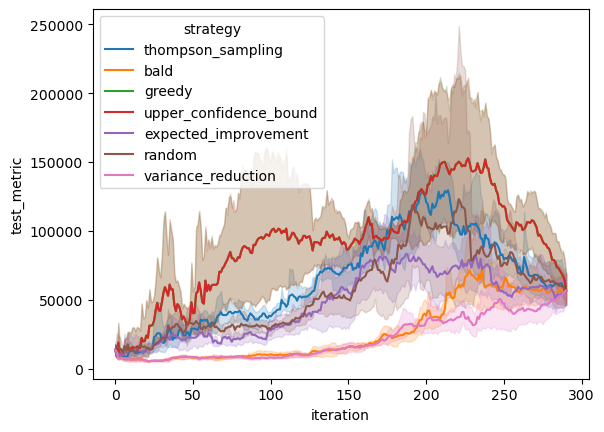

In [8]:
sns.lineplot(data=sns_results_df, x="iteration", y="test_metric", hue="strategy")